In [127]:
import pandas as pd
import networkx as nx
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [128]:
emails = pd.read_csv('./input/Emails.csv')

In [129]:
file = pd.read_csv('./input/Aliases.csv')
aliases = {}
for index, row in file.iterrows():
    aliases[row['Alias']] = row['PersonId']
#print(aliases)

In [130]:
file = pd.read_csv('./input/Persons.csv')
persons = {}
for index, row in file.iterrows():
    persons[row['Id']] = row['Name']
#print(persons)

In [131]:
def unify_name(name):
    name = str(name).lower()
    name = name.replace(',','').split('@')[0]
    if name in aliases.keys():
        return persons[aliases[name]]
    return name

In [132]:
def show_graph(graph, layout='sprint_layout'):
    if layout == 'circular_layout':
        positions = nx.circular_layout(graph)
    else:
        positions = nx.spring_layout(graph)
    nodesize = [x['pagerank']*20000 for v,x in graph.nodes(data=True)]
    edgesize = [np.sqrt(e[2]['weight']) for e in graph.edges(data=True)]
    nx.draw_networkx_nodes(graph, positions, node_size=nodesize, alpha=0.4)
    nx.draw_networkx_edges(graph, positions, edge_size=edgesize, alpha=0.2)
    nx.draw_networkx_labels(graph, positions, font_size=10)
    plt.show()

In [133]:
emails.MetadataFrom = emails.MetadataFrom.apply(unify_name)
emails.MetadataTo = emails.MetadataTo.apply(unify_name)


In [134]:
edges_weights_temp = defaultdict(list)
for row in zip(emails.MetadataFrom, emails.MetadataTo, emails.RawText):
    temp = (row[0],row[1])
    if temp not in edges_weights_temp:
        edges_weights_temp[temp] = 1
    else:
        edges_weights_temp[temp] = edges_weights_temp[temp]+1
edges_weights_temp   

defaultdict(list,
            {('Jake Sullivan', 'Hillary Clinton'): 815,
             ('nan', 'Hillary Clinton'): 20,
             ('Cheryl Mills', ';h'): 1,
             ('Cheryl Mills', 'Hillary Clinton'): 1182,
             ('Hillary Clinton', 'Huma Abedin'): 32,
             ('Hillary Clinton', 'russorv'): 26,
             ('slaughter anne-marie', 'Hillary Clinton'): 126,
             ('Harold Hongju Koh', 'Hillary Clinton'): 12,
             ('Wendy Sherman', 'Hillary Clinton'): 7,
             ('Jake Sullivan', 'Wendy Sherman'): 1,
             ('Hillary Clinton', 'sullivanjj'): 288,
             ('Sidney Blumenthal', 'Hillary Clinton'): 361,
             ('Burns Strider', 'Hillary Clinton'): 2,
             ('Huma Abedin', 'Hillary Clinton'): 1322,
             ('Cheryl Mills', 'Cheryl Mills'): 17,
             ('Robert Russo', 'Hillary Clinton'): 22,
             ('Capricia Marshall', 'Cheryl Mills'): 2,
             ('Hillary Clinton', 'Oscar Flores'): 5,
             ('Willi

In [135]:
edges_weights = [(key[0], key[1], val) for key, val in edges_weights_temp.items()]
print(edges_weights)
graph = nx.DiGraph()
graph.add_weighted_edges_from(edges_weights)
pagerank = nx.pagerank(graph)
pagerank

[('Jake Sullivan', 'Hillary Clinton', 815), ('nan', 'Hillary Clinton', 20), ('Cheryl Mills', ';h', 1), ('Cheryl Mills', 'Hillary Clinton', 1182), ('Hillary Clinton', 'Huma Abedin', 32), ('Hillary Clinton', 'russorv', 26), ('slaughter anne-marie', 'Hillary Clinton', 126), ('Harold Hongju Koh', 'Hillary Clinton', 12), ('Wendy Sherman', 'Hillary Clinton', 7), ('Jake Sullivan', 'Wendy Sherman', 1), ('Hillary Clinton', 'sullivanjj', 288), ('Sidney Blumenthal', 'Hillary Clinton', 361), ('Burns Strider', 'Hillary Clinton', 2), ('Huma Abedin', 'Hillary Clinton', 1322), ('Cheryl Mills', 'Cheryl Mills', 17), ('Robert Russo', 'Hillary Clinton', 22), ('Capricia Marshall', 'Cheryl Mills', 2), ('Hillary Clinton', 'Oscar Flores', 5), ('William Burns', 'Hillary Clinton', 10), ('Monica Hanley', 'Hillary Clinton', 24), ('Hillary Clinton', 'abedinh', 345), ('Hillary Clinton', 'millscd', 298), ('Daniel Schwerin', 'Hillary Clinton', 9), ('Hillary Clinton', 'hanleymr', 33), ('Monica Hanley', 'Daniel Schweri

{'Jake Sullivan': 0.005791704166582624,
 'Hillary Clinton': 0.30625575336382416,
 'nan': 0.13999227061446815,
 'Cheryl Mills': 0.009358382485728864,
 ';h': 0.0008967850871949974,
 'Huma Abedin': 0.010664457957706461,
 'russorv': 0.004414888802206403,
 'slaughter anne-marie': 0.001411729861610798,
 'Harold Hongju Koh': 0.0009914506387867286,
 'Wendy Sherman': 0.0011673799493548969,
 'sullivanjj': 0.040032942578700645,
 'Sidney Blumenthal': 0.007543328643239068,
 'Burns Strider': 0.0010366588039860962,
 'Robert Russo': 0.0008904426392777106,
 'Capricia Marshall': 0.0017166548334911842,
 'Oscar Flores': 0.0016529953921252999,
 'William Burns': 0.0011615538825799176,
 'Monica Hanley': 0.0008904426392777106,
 'abedinh': 0.04865794676080488,
 'millscd': 0.04143526549410853,
 'Daniel Schwerin': 0.0009243019859440611,
 'hanleymr': 0.005370314170153694,
 'Philippe Reines': 0.009023759500896596,
 'Thomas Nides': 0.0009399158462110825,
 'jilotylc': 0.03160717295021766,
 'Melanne Verveer': 0.00224

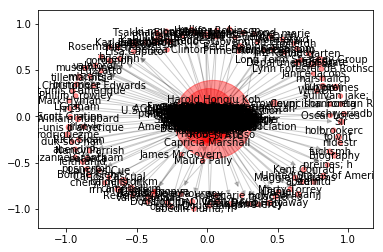

In [136]:
nx.set_node_attributes(graph, name = 'pagerank', values=pagerank)
show_graph(graph)

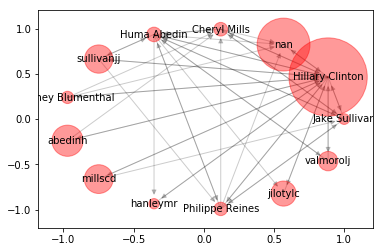

In [137]:
pagerank_threshold = 0.005
small_graph = graph.copy()
for n, p_rank in graph.nodes(data=True):
    if p_rank['pagerank'] < pagerank_threshold:
        small_graph.remove_node(n)

show_graph(small_graph,'circular_layout')